In [31]:
import spacy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, make_scorer

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC

In [33]:
emotions = ['love','anger','fear','surprise','joy','sadness']

df_love = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/love.csv',sep=';',encoding='iso-8859-1')

df_anger = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/anger.csv',sep=';',encoding='iso-8859-1')

df_fear = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/fear.csv',sep=';',encoding='iso-8859-1')

df_surprise = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/surprise.csv',sep=';',encoding='iso-8859-1')

df_joy = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/joy.csv',sep=';',encoding='iso-8859-1')

df_sadness = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/sadness.csv',sep=';',encoding='iso-8859-1')

df_list = [df_love,df_anger,df_fear,df_surprise,df_joy,df_sadness]

Word vectors, or word embeddings, are vectors of numbers that provide information about the meaning of a word, as well as its context.

spaCy’s small pipeline packages (all packages that end in sm) don’t ship with word vectors, and only include context-sensitive tensors. So in order to use real word vectors, we need to download a larger pipeline package, trained using the word2vec family of algorithms:

In [34]:
#!pip install spacy-transformers
# en_core_web_trf

!python -m spacy download en_core_web_lg

nlp = spacy.load("en_core_web_lg")


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 587.7/587.7 MB 3.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


Pipeline packages that come with built-in word vectors make them available as the Token.vector attribute.
Doc.vector and Span.vector will default to an average of their token vectors. Vector averaging means that the vector of multiple tokens is insensitive to the order of the words.
The vector will be a one-dimensional Numpy array of float numbers and has 300 dimensions. The sentence vector is the same shape as the word vector because it is made up of the average of the word vectors over each word in the sentence.

In each dataframe we have same set of sentences, so x will be the same

In [35]:
sentences = df_love['Text']

In [36]:

class WordVectorTransformer(TransformerMixin,BaseEstimator):
    def __init__(self, model="en_core_web_lg"):
        self.model = model

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        nlp = spacy.load(self.model)
        return np.concatenate([nlp(doc).vector.reshape(1,-1) for doc in X])

In [37]:
# i indice vettore nomi emozioni

def set_labels(df,i):
    y = df['label']
    y = y.fillna(0)
    y = y.map({emotions[i].upper(): 1, 0: 0}).astype(int)
    return y

x = sentences

y = set_labels(df_anger,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

SVM

In [41]:
steps = [
    ("scaler", WordVectorTransformer()),
    ("sampler", RandomUnderSampler()),
    ("selection", SelectKBest(k=40)),
    ("classification", LinearSVC(max_iter=10000))
]

pipeline = Pipeline(steps)


C:\Users\kecco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.66      0.77       784
           1       0.32      0.70      0.44       176

    accuracy                           0.67       960
   macro avg       0.61      0.68      0.60       960
weighted avg       0.80      0.67      0.71       960



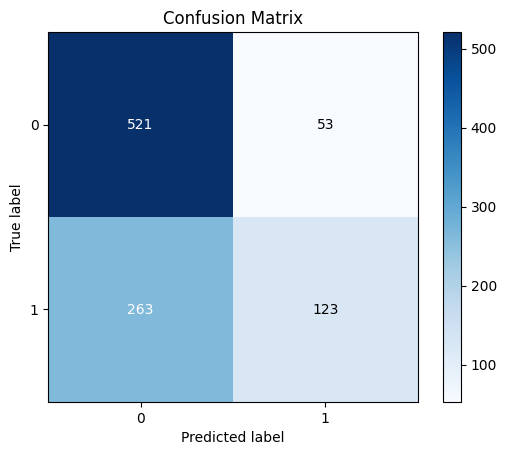

In [42]:
pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)
print(classification_report(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_pred, y_test)
plt.show()

In [39]:
def classification_report_with_accuracy_score(y_test, y_pred):

    print(classification_report(y_test, y_pred)) # print classification report
    return accuracy_score(y_test, y_pred) # return accuracy score

results = cross_val_score(
    pipeline,
    x,
    y,
    cv = StratifiedKFold(shuffle=True, random_state=15, n_splits=5),
    scoring=make_scorer(classification_report_with_accuracy_score)
)

print(results)

C:\Users\kecco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.68      0.78       784
           1       0.32      0.66      0.43       176

    accuracy                           0.68       960
   macro avg       0.61      0.67      0.60       960
weighted avg       0.79      0.68      0.71       960



C:\Users\kecco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.63      0.74       784
           1       0.29      0.69      0.41       176

    accuracy                           0.64       960
   macro avg       0.60      0.66      0.57       960
weighted avg       0.79      0.64      0.68       960



C:\Users\kecco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.61      0.73       784
           1       0.30      0.74      0.42       176

    accuracy                           0.63       960
   macro avg       0.61      0.67      0.58       960
weighted avg       0.80      0.63      0.67       960



C:\Users\kecco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.65      0.76       783
           1       0.31      0.69      0.43       177

    accuracy                           0.66       960
   macro avg       0.61      0.67      0.59       960
weighted avg       0.79      0.66      0.70       960



C:\Users\kecco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.65      0.75       783
           1       0.31      0.69      0.42       177

    accuracy                           0.65       960
   macro avg       0.60      0.67      0.59       960
weighted avg       0.79      0.65      0.69       960

[0.67708333 0.6375     0.63333333 0.659375   0.65416667]


RANDOM FOREST

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       784
           1       0.37      0.36      0.37       176

    accuracy                           0.77       960
   macro avg       0.61      0.61      0.61       960
weighted avg       0.77      0.77      0.77       960



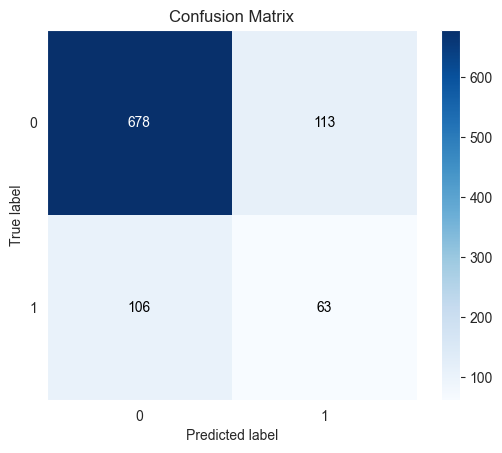

In [9]:
steps = [
    ("scaler", WordVectorTransformer()),
    ("sampler", SMOTE()),
    ("selection", SelectKBest(k=40)),
    ("classification", RandomForestClassifier())
]

pipeline = Pipeline(steps)

pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)
print(classification_report(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_pred, y_test)
plt.show()

KNN

              precision    recall  f1-score   support

           0       0.92      0.50      0.65       784
           1       0.26      0.80      0.40       176

    accuracy                           0.56       960
   macro avg       0.59      0.65      0.52       960
weighted avg       0.80      0.56      0.60       960



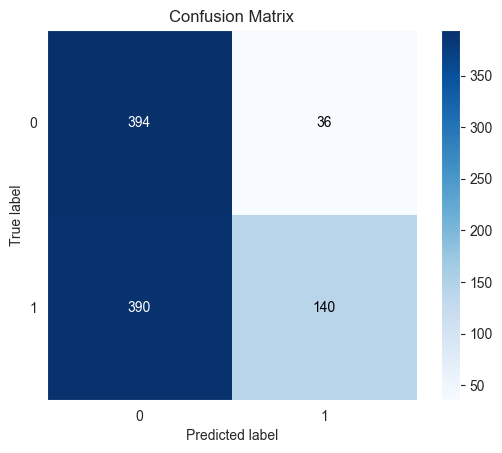

In [10]:
steps = [
    ("scaler", WordVectorTransformer()),
    ("sampler", SMOTE()),
    ("selection", SelectKBest(k=40)),
    ("classification", KNeighborsClassifier())
]

pipeline = Pipeline(steps)

pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)
print(classification_report(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_pred, y_test)
plt.show()

DUMMY

C:\Users\kecco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kecco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kecco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       784
           1       0.00      0.00      0.00       176

    accuracy                           0.82       960
   macro avg       0.41      0.50      0.45       960
weighted avg       0.67      0.82      0.73       960



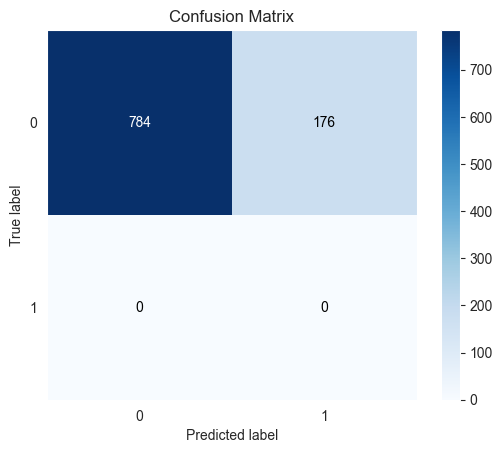

In [11]:
steps = [
    ("scaler", WordVectorTransformer()),
    ("sampler", SMOTE()),
    ("selection", SelectKBest(k=40)),
    ("classification", DummyClassifier())
]

pipeline = Pipeline(steps)

pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)
print(classification_report(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_pred, y_test)
plt.show()

In [12]:
df_anger_j = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/Jira/anger.csv',sep=';')

print(df_anger_j)

                                                  Text  label
0                         guys... this is so stupid...  ANGER
1    I lost the whole morning cause HBase's RegionS...  ANGER
2    {quote}You are messing down deep below hbase i...  ANGER
3    And I think if we're going to do a sweep up of...  ANGER
4    @idiot Yeah, I was on that idiot-path for a go...  ANGER
..                                                 ...    ...
969  You don't see '>' replaced because that's not ...    NaN
970                                  Making a blocker.    NaN
971                 I've reverted this for the moment.    NaN
972           and at the moment we dont have that yet.    NaN
973  Maybe we're stuck with it until log4j fixes it...    NaN

[974 rows x 2 columns]


In [13]:
df_final = pd.concat([df_anger,df_anger_j])

print(df_final)

                                                  Text label
0    SVG transform on text attribute works excellen...   NaN
1    Excellent! This is exactly what I needed. Thanks!   NaN
2    Have added a modern solution as of May 2014 in...   NaN
3    Have you tried removing 'preload' attribute? (...   NaN
4    A smarter, entirely C++-way of doing what you ...   NaN
..                                                 ...   ...
969  You don't see '>' replaced because that's not ...   NaN
970                                  Making a blocker.   NaN
971                 I've reverted this for the moment.   NaN
972           and at the moment we dont have that yet.   NaN
973  Maybe we're stuck with it until log4j fixes it...   NaN

[5774 rows x 2 columns]


In [14]:
sentences = df_final['Text']
print(sentences)

0      SVG transform on text attribute works excellen...
1      Excellent! This is exactly what I needed. Thanks!
2      Have added a modern solution as of May 2014 in...
3      Have you tried removing 'preload' attribute? (...
4      A smarter, entirely C++-way of doing what you ...
                             ...                        
969    You don't see '>' replaced because that's not ...
970                                    Making a blocker.
971                   I've reverted this for the moment.
972             and at the moment we dont have that yet.
973    Maybe we're stuck with it until log4j fixes it...
Name: Text, Length: 5774, dtype: object


In [15]:
x = sentences

y = set_labels(df_final,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

SVM

C:\Users\kecco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.88      0.65      0.75       914
           1       0.34      0.67      0.45       241

    accuracy                           0.66      1155
   macro avg       0.61      0.66      0.60      1155
weighted avg       0.77      0.66      0.69      1155



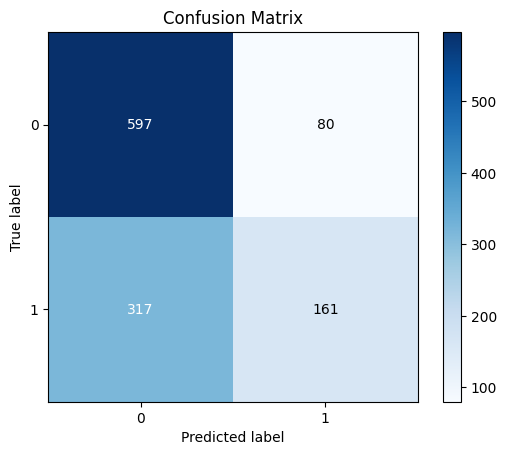

In [16]:
steps = [
    ("scaler", WordVectorTransformer()),
    ("sampler", SMOTE()),
    ("selection", SelectKBest(k=40)),
    ("classification", LinearSVC())
]

pipeline = Pipeline(steps)

pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)
print(classification_report(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_pred, y_test)
plt.show()

RANDOM FOREST

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       914
           1       0.40      0.33      0.36       241

    accuracy                           0.76      1155
   macro avg       0.62      0.60      0.61      1155
weighted avg       0.74      0.76      0.75      1155



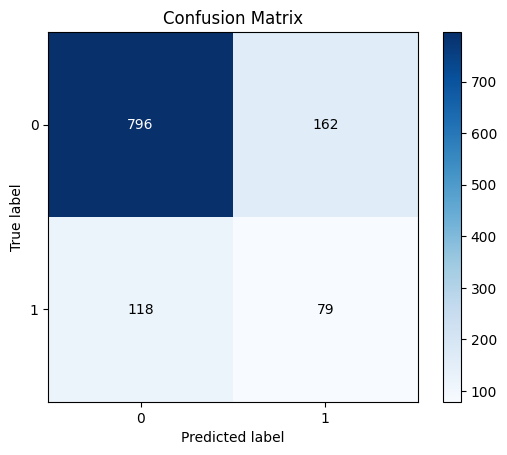

In [18]:
steps = [
    ("scaler", WordVectorTransformer()),
    ("sampler", SMOTE()),
    ("selection", SelectKBest(k=40)),
    ("classification", RandomForestClassifier())
]

pipeline = Pipeline(steps)

pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)
print(classification_report(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_pred, y_test)
plt.show()

KNN

              precision    recall  f1-score   support

           0       0.86      0.47      0.61       914
           1       0.26      0.71      0.38       241

    accuracy                           0.52      1155
   macro avg       0.56      0.59      0.49      1155
weighted avg       0.73      0.52      0.56      1155



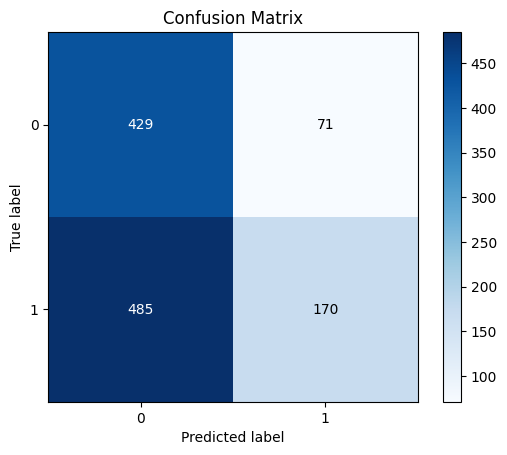

In [19]:
steps = [
    ("scaler", WordVectorTransformer()),
    ("sampler", SMOTE()),
    ("selection", SelectKBest(k=40)),
    ("classification",  KNeighborsClassifier())
]

pipeline = Pipeline(steps)

pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)
print(classification_report(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_pred, y_test)
plt.show()

DUMMY

C:\Users\kecco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kecco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kecco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       914
           1       0.00      0.00      0.00       241

    accuracy                           0.79      1155
   macro avg       0.40      0.50      0.44      1155
weighted avg       0.63      0.79      0.70      1155



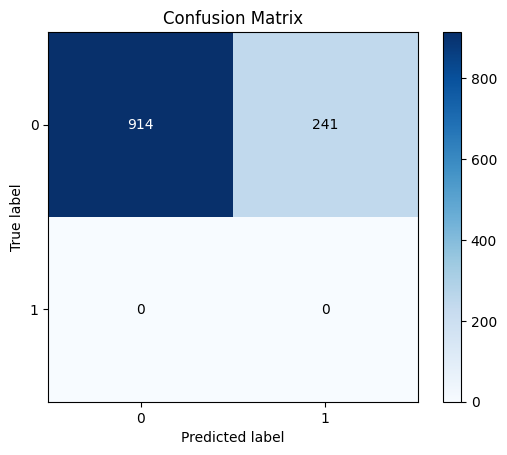

In [20]:
steps = [
    ("scaler", WordVectorTransformer()),
    ("sampler", SMOTE()),
    ("selection", SelectKBest(k=40)),
    ("classification", DummyClassifier())
]

pipeline = Pipeline(steps)

pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)
print(classification_report(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_pred, y_test)
plt.show()